<center>
<a href="https://www.vision.rwth-aachen.de/">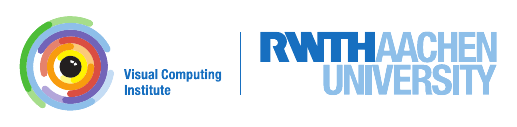</a>
</center>

# Advanced Machine Learning Excercises

**Assistants:**
<br>
Alexey Nekrasov &lt;nekrasov@vision.rwth-aachen.de&gt;
<br>
Jens Piekenbrinck &lt;piekenbrinck@vision.rwth-aachen.de&gt;

The assignments are **NOT** mandatory, but we still encourage you to work on them, in order to gain a deeper understanding.

We want to provide you with an interactive learning experience, so the assignments rely on [Jupyter](https://jupyter.org/) notebooks which you can run locally on your computer. The RWTH also offers a [JupyterHub](jupyter.rwth-aachen.de/) where you can run notebooks. If you have any questions, please contact us.

Make sure you fill in any place in *code cells* that says:
```python
# YOUR CODE HERE
raise NotImplementedError()
```

Make sure you fill in any place in *text cells* that says:
<br>

`YOUR ANSWER HERE`


### Submission:
Before submission remove outputs from the notebooks to prevent sending large files.
With images a hundred submissions could occupy a few GB of space.
To erase the outputs before submission, use a tool [nbstripout](https://github.com/kynan/nbstripout).

Upload all the notebook files with your changes to moodle. **IMPORTANT**: Do not rename files.

⏰ Due date: 2024-04-29 23:59:00

# Exercise 1: Regression


In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
np.random.seed(42)

## Question 1: Bayesian Inferencing


(a) Assume that training data points $\mathbf{X}=[\mathbf{x}_1,\ldots,\mathbf{x}_N]\in\mathbb{R}^{d\times N}$ and corresponding scalar target values $\mathbf{t}=[t_1,\ldots,t_N]^\text{T}$ are drawn independently with a likelihood in the form

$$
\begin{aligned} p(\mathbf{t}\vert\mathbf{X},\mathbf{w},\beta)=\prod_{n=1}^N\mathcal{N}(t_n\vert\mathbf{w}^\text{T}\mathbf{\phi}(\mathbf{x}_n), \beta^{-1})
\end{aligned}
$$

for parameters $\mathbf{w}$ and $\beta$. Let a Gaussian prior over the coefficients $\mathbf{w}$ be given by

$$
\begin{aligned}
        p(\mathbf{w}|\alpha)=\mathcal{N}(\mathbf{w}\vert\mathbf{0},\alpha^{-1}\mathbf{I}).
\end{aligned}
$$

Under these assumptions it can be shown that the resulting posterior distribution

$$
\begin{aligned}
            p(\mathbf{w}|\mathbf{X},\mathbf{t},\beta,\alpha)\propto p(\mathbf{t}\vert\mathbf{X},\mathbf{w},\beta) p(\mathbf{w}|\alpha)
\end{aligned}
$$

is again a Gaussian, wherefore the prior and posterior distributions are called _conjugate_. Show that the mean $\pmb{\mu}_N$ and variance $\mathbf{\Sigma}_N$ of the posterior distribution are given by

$$
\begin{aligned}
    \pmb{\mu}_N=\beta\mathbf{\Sigma}_N\mathbf{\Phi}^\text{T}\mathbf{t}\quad\text{and}\quad\mathbf{\Sigma}_N^{-1}=\alpha\mathbf{I}+\beta\mathbf{\Phi}^\text{T}\mathbf{\Phi}.
\end{aligned}
$$


(b) The posterior in part (a) can be regarded as the prior for the next observation. By considering an additional data point $(\mathbf{x}_{N+1}, t_{N+1})$, show that the resulting posterior distribution takes again the above form but with $N$ replaced by $N+1$.


## Question 2: Loss Functions For Regression


Consider the expected loss

$$
\begin{aligned}
        \mathbb{E}[L_q]=\int_{\mathbb{R}^d}\int_\mathbb{R}L_q(t,y(\mathbf{x}))p(\mathbf{x},t)\text{d}t\text{d}\mathbf{x}
\end{aligned}
$$

for the _Minkowski loss_ function $L_q(t,y(\mathbf{x}))=\vert y(\mathbf{x})-t\vert^q$. In the lecture you have seen that the optimal regression function $y:\mathbb{R}^d\rightarrow\mathbb{R}$ that minimizes $\mathbb{E}[L_q]$ for the squared loss $q=2$ is given by the _conditional mean_ $y(\mathbf{x})=\mathbb{E}[t\vert\mathbf{x}]=\int_\mathbb{R}tp(t\vert\mathbf{x})\text{d}t$.


(a) Show that for $q=1$ the optimal regression function is given by the _conditional median_

$$
\begin{aligned}
    y(\mathbf{x})=\mathop{\mathrm{argmin}}_{\hat y}\int_\mathbb{R}\vert\hat y -t\vert p(t\vert\mathbf{x})\text{d}t
\end{aligned}
$$


$$
\begin{aligned}
\mathbb{E}[L_{q}]
 & =\int_{\mathbb{R}^{d}}\int_{\mathbb{R}}|y(x)-t|^{q}p(x,t)dt\,dx\\\\
 & \quad\; \text{with } p(x,t)=p(x)p(t|x)\\\\
 & =\int_{\mathbb{R}^{d}}p(x)\left(\int_{\mathbb{R}}|y(x)-t|^{q}p(t|x)dt\right)dx
\end{aligned}
$$

For every $x\in\mathbb{R}^{d}$, choose $\hat{y}:=y(x)\in\mathbb{R}$, such that
$$F_{q}(\hat{y}|x):=\int_{\mathbb{R}}|y(x)-t|^{q}p(t|x)dt\stackrel{!}{\rightarrow}\min$$

For $q=1$, this gives $y(x)=\arg\min_{\hat{y}\in\mathbb{R}}\left(F_{q}(\hat{y}|x)\right)$


(b) Show that for $q\rightarrow 0$ the optimal regression function is given
by the _conditional mode_

$$
\begin{aligned}
    y(\mathbf{x})=\mathop{\mathrm{argmax}}_{t\in\mathbb{R}}p(t\vert\mathbf{x})
\end{aligned}
$$


Copied from Solution:

<u>Assumption</u>: $p(\cdot\vert\mathbf{x})$ is uniformly continuous

**1\.** Fix $0 < \epsilon \ll 1$:\
$\begin{aligned}
\quad \Rightarrow \; & \exists \; 0 < \delta = \delta(\epsilon) \ll 1 \text{ so that } \forall \hat{y}\in\mathbb{R}, t\in U_\delta(0)\\
 & \left\vert p(\hat{y}+t\vert x) - p(\hat{y}\vert x) \right\vert < \epsilon
\end{aligned}$

<br><br>

**2\.** Consider:\
$\begin{aligned}
\quad F_q(\hat{y}\vert x)
  & = \int_\mathbb{R} \vert \hat{y}-t \vert^q p(t\vert x) dt\\
  & = \int_\mathbb{R} \vert t \vert^q p(\hat{y}+t\vert x) dt\\
  & = \underbrace{\int_{\mathbb{R} \setminus U_\delta(0)} \vert t \vert^q p(\hat{y}+t\vert x) dt}_{\text{step 2.1.}} + \int_{U_\delta(0)} \vert t \vert^q p(\hat{y}+t\vert x) dt
\end{aligned}$

**2.1.** Choose $0 < q = q(\delta) \ll 1$:\
$\begin{aligned}
& \left\vert \int_{\mathbb{R} \setminus U_\delta(0)} \vert t \vert^q p(\hat{y}+t\vert x) dt - \int_{\mathbb{R} \setminus U_\delta(0)} p(\hat{y}+t\vert x) dt \right\vert < \epsilon\\\\
\quad \Rightarrow & \int_{\mathbb{R} \setminus U_\delta(0)} \vert t \vert^q p(\hat{y}+t\vert x) dt = \int_{\mathbb{R} \setminus U_\delta(0)} p(\hat{y}+t\vert x) dt + \mathcal{O}(\epsilon)
\end{aligned}$

<br><br>

**3\.** Insert 2.1. into 2.:\
$\begin{aligned}
\quad \ldots = & \int_{\mathbb{R} \setminus U_\delta(0)} p(\hat{y}+t\vert x) dt + \int_{U_\delta(0)} \vert t \vert^q p(\hat{y}+t\vert x) dt + \mathcal{O}(\epsilon)\\\\
= & \underbrace{\int_{\mathbb{R}} p(\hat{y}+t\vert x) dt}_{=1} - \underbrace{\int_{U_\delta(0)} (1 - \vert t \vert^q) \cdot p(\hat{y}+t\vert x) dt}_{\text{step 3.1.}} + \mathcal{O}(\epsilon)
\end{aligned}$

**3.1.**\
$\begin{aligned}
& \left\vert \int_{U_\delta(0)} (1 - \vert t \vert^q) \cdot p(\hat{y}+t\vert x) dt - \int_{U_\delta(0)} (1 - \vert t \vert^q) \cdot p(\hat{y}\vert x) dt\right\vert\\\\
\quad = \; & \left\vert \int_{U_\delta(0)} (1 - \vert t \vert^q) \cdot \left[ p(\hat{y}+t\vert x) - p(\hat{y}\vert x) \right] dt \right\vert\\\\
\leq \; & \int_{U_\delta(0)} (1 - \vert t \vert^q) \cdot \underbrace{\left\vert p(\hat{y}+t\vert x) - p(\hat{y}\vert x) \right\vert}_{< \epsilon \text{ by uniform continuity}} dt\\\\
< \; & \epsilon \cdot \int_{U_\delta(0)} (1 - \vert t \vert^q) dt = \mathcal{O}(\epsilon)
\end{aligned}$

<br>

$\begin{aligned}
\quad \Rightarrow & \quad \; \int_{U_\delta(0)} (1 - \vert t \vert^q) \cdot p(\hat{y}+t\vert x) dt\\\\
& = \int_{U_\delta(0)} (1 - \vert t \vert^q) \cdot p(\hat{y}\vert x) dt + \mathcal{O}(\epsilon)\\\\
& = \left( \int_{U_\delta(0)} (1 - \vert t \vert^q) dt \right) p(\hat{y}\vert x) + \mathcal{O}(\epsilon)
\end{aligned}$

<br><br>

**4\.** Insert 3.1 into 3.:\
$\begin{aligned}
\quad \ldots = & \; 1 - \underbrace{\left( \int_{U_\delta(0)} (1 - \vert t \vert^q) dt \right)}_{> 0} p(\hat{y}\vert x) + \mathcal{O}(\epsilon)\\\\
\Rightarrow & \; \arg\min_{\hat{y}\in \mathbb{R}} F_q(\hat{y} \vert x) = \arg\max_{\hat{y}\in \mathbb{R}} p(\hat{y}\vert x) =: y(x)
\end{aligned}$


## Question 3: Least Squares Regression


In this problem your task is to learn a function, $f: \mathbb{R} \rightarrow \mathbb{R}$, given the training data using least squares regression.

You will use the datasets `test.txt` and `train.txt`, in which the data matrices contain 1D data points $x_i \in \mathbb{R}$ in the first column and the corresponding target output values $y_i \in \mathbb{R}$ in the second column.

Instead of the polynomial basis functions discussed in class, here you will use the Fourier basis functions: $$\begin{aligned}
        \phi_0(x) = 1
        \hspace{1cm}  \phi_{2l-1}(x) = \frac{1}{l} \text{cos}(2\pi l x)
        \hspace{1cm}  \phi_{2l}(x) = \frac{1}{l} \text{sin}(2\pi l x)
\end{aligned}$$
where $l\ (l = 1,2,3,\ldots)$ is the frequency of the basis function.

Thus, given the maximal frequency $k$, we will have $M=2k+1$ basis functions.

For a fixed frequency $k$, every data pair $(x_i, y_i),\ i=1,\ldots,N,$ defines an equation $$\begin{aligned}
        w_0\cdot\phi_0(x_i)+w_1\cdot\phi_1(x_i)+\cdots+w_{2k}\cdot\phi_{2k}(x_i)=y_i
    \end{aligned}$$ with coefficients $w_0,\ldots,w_{2k}\in\mathbb{R}$.

Writing them into a single matrix equation, we get

$$
\begin{aligned}
        \underbrace{\begin{bmatrix}
            \phi_0(x_0) & \phi_1(x_0) & \cdots & \phi_{2k}(x_0) \\
            \phi_0(x_1) & \phi_1(x_1) & \cdots & \phi_{2k}(x_1) \\
            \vdots & \vdots & \vdots & \vdots\\
            \phi_0(x_N) & \phi_1(x_N) & \cdots & \phi_{2k}(x_N)
        \end{bmatrix}}_{\mathbf{\Phi}}
        \cdot
        \underbrace{\begin{bmatrix}
            w_0\\
            w_1\\
            \vdots\\
            w_{2k}
        \end{bmatrix}}_{\mathbf{w}}
        =
        \underbrace{\begin{bmatrix}
            y_0\\
            y_1\\
            \vdots\\
            y_N
        \end{bmatrix}}_{\mathbf{y}}.
\end{aligned}
$$

Since the system $\mathbf{\Phi}\cdot\mathbf{w}=\mathbf{y}$ is usually overconstrained, it does not have an exact solution.

Instead, we consider the solution to the minimization problem

$$
\begin{aligned}
        \lVert\mathbf{\Phi}\cdot\mathbf{w}-\mathbf{y}\rVert^2\rightarrow\min,
\end{aligned}
$$

which is given by the _normal equations_ $\mathbf{w}=(\mathbf{\Phi}^\text{T}\mathbf{\Phi})^{-1}\mathbf{\Phi}^\text{T}\mathbf{y}$.


### Question 3.a: Plot the data and compute fourier features

Load the data `train.txt` and use least squares regression to fit functions $f_k$ with the maximal frequency $k=0,1,2,\ldots,8$ and corresponding maximum number of components $M=1,3,5,\ldots,17$.
Plot the $9$ resulting functions together with the training data into a single figure.
Explain the effect of the increasing $k$ on the fitting function $f_k$.


In [3]:
train = np.genfromtxt("train.txt")
train_X, train_y = train[:, 0], train[:, 1]
test = np.genfromtxt("test.txt")
test_X, test_y = test[:, 0], test[:, 1]

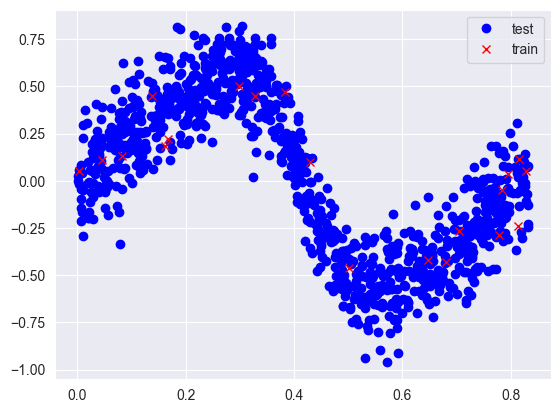

In [4]:
# you don't have to modify this cell
plt.plot(test_X, test_y, "bo")
plt.plot(train_X, train_y, "rx")
plt.legend(["test", "train"])

In [5]:
def fourier_features(x, n):
    """
    Produces fourier features given a basis function index.

    Parameters
    ----------
    x : array_like
        input array of shape (N,).
    n : int
        basis function index.

    Returns
    -------
    x_tilda : array_like
        resulting fourier features of shape (N,).

    """
    # read the task
    ### BEGIN SOLUTION
    if n == 0:
        return np.ones_like(x)
    if n % 2 == 1:
        l = (n + 1) / 2
        return (1 / l) * np.cos(2 * np.pi * l * x)
    else:
        l = n / 2
        return (1 / l) * np.sin(2 * np.pi * l * x)
    ### END SOLUTION

In [6]:
assert 1 == fourier_features(np.array([0]), 1)
assert 0 == fourier_features(np.array([0]), 2)
assert np.allclose(np.array([1, 1]), fourier_features(np.array([0, 0]), 0))

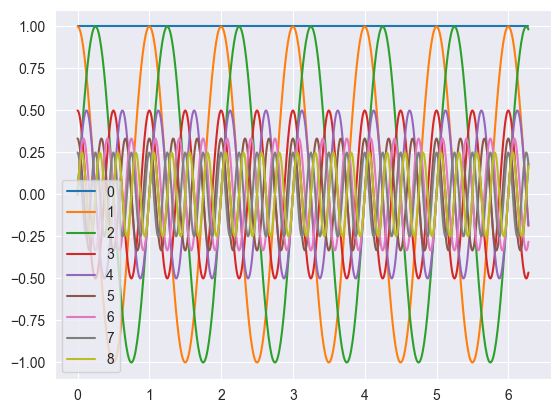

In [7]:
# Plot of 9 resuting fourier functions.
# you don't have to modify this cell
train_tmp = np.arange(0, 2 * np.pi, 0.01)
question_check = []
labels = []
for n in range(9):
    ffeatures = fourier_features(train_tmp, n)
    plt.plot(train_tmp, ffeatures)
    question_check.append(ffeatures[11])
    labels.append(f"{n}")
plt.legend(labels)

### Question 3.b: Feature matrix, calculation of weights and metrics. Regression.

For each $k$, compute the _root mean square error_ $E_\text{RMS}=\sqrt{E(\mathbf{w})^2/N}$ on both, training and test data, as a function of maximum frequency $k$.


In [8]:
def get_feature_matrix(train, max_m):
    """
    Get a feature matrix.

    Parameters
    ----------
    train : array_like
        input array of shape (N,).
    max_m : int
        maximum number of fourier features M.

    Returns
    -------
    features : array_like
        resulting features matrix (N,K).

    """
    features = []
    for i in range(max_m):
        features.append(fourier_features(train, i)[:, np.newaxis])
    features = np.hstack(features)
    return features

In [9]:
assert 1 == get_feature_matrix(np.array([0]), 1)
assert np.allclose(np.array([[1, 1]]), get_feature_matrix(np.array([0]), 2))

In [10]:
def calculate_weights(train_features, train_labels):
    """
    Weights calculation for regression.

    Parameters
    ----------
    features : array_like
        input array of shape (N,K).
    labels : array_like
        labels of shape (N).

    Returns
    -------
    w : array_like
        resulting weights matrix (N,).

    """
    # hint: you can use np.linalg.pinv for this one
    w = np.linalg.pinv(train_features) @ train_labels
    return w

In [11]:
assert 1 == calculate_weights(np.array([[1]]), np.array([1]))
assert np.allclose(
    [0.5, 0.5], calculate_weights(np.array([[0, 0], [1, 1]]), np.array([0, 1]))
)

In [12]:
def get_rmse(labels, prediction):
    """
    Calculate root mean square metrics.

    Parameters
    ----------
    labels : array_like
        labels of shape (N,).
    prediction : array_like
        prediction array of shape (N,).

    Returns
    -------
    rmse : float
        resulting rmse.

    """
    rmse = np.sqrt(np.mean(np.square(labels - prediction)))
    return rmse

In [13]:
assert 0 == get_rmse(np.array([1, 1]), np.array([1, 1]))
assert 1 == get_rmse(np.array([0, 0]), np.array([1, 1]))

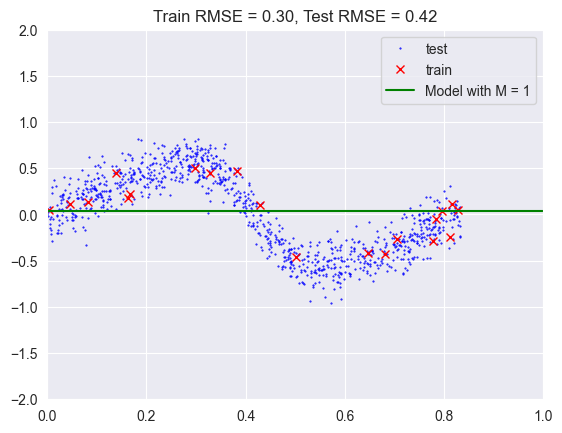

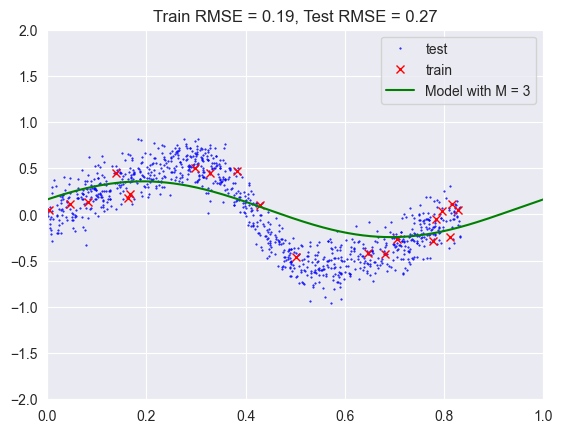

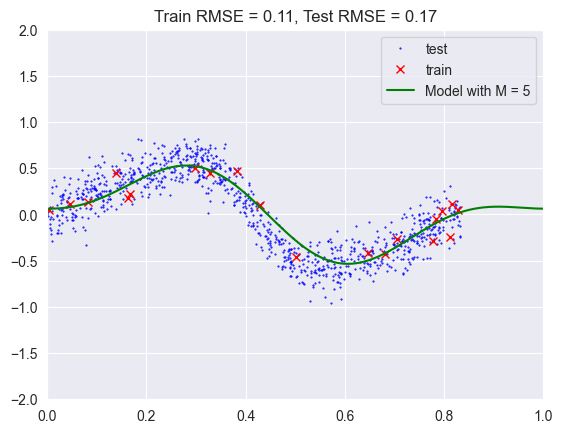

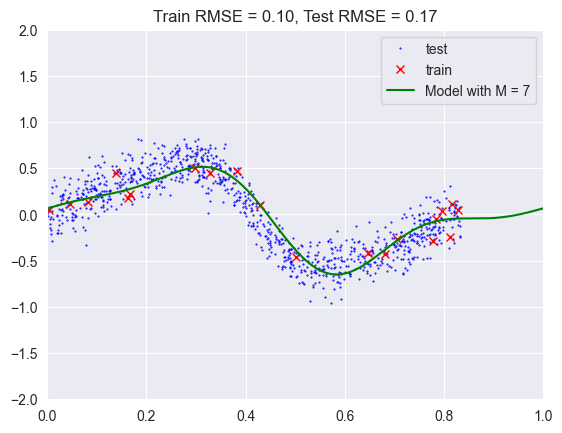

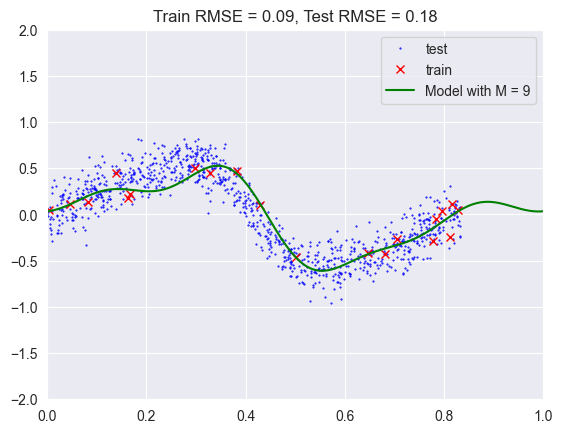

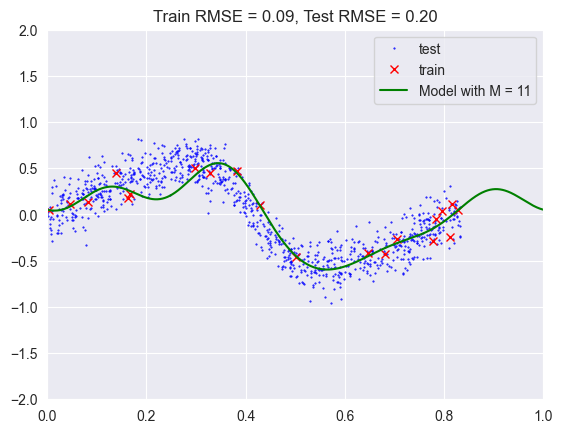

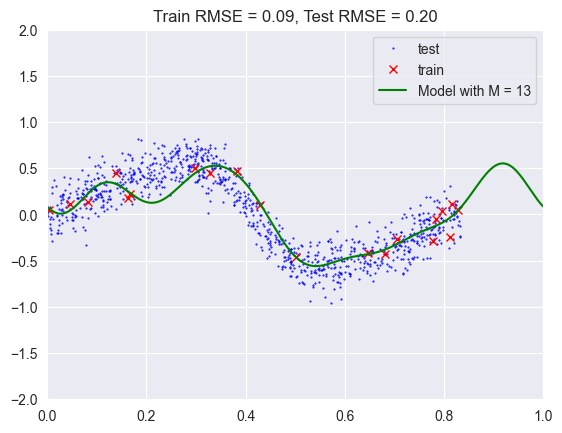

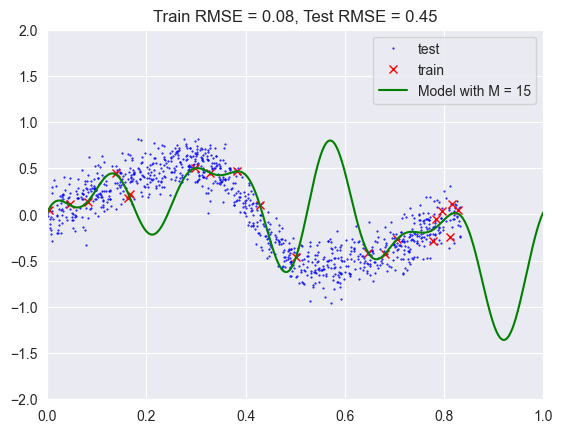

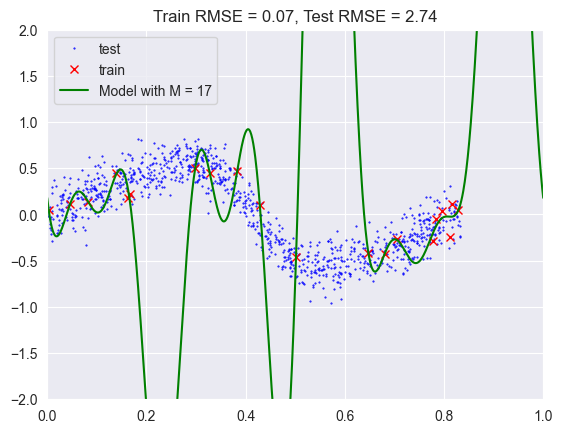

In [14]:
# you don't have to modify this cell
x = np.linspace(0, 1, 1000)
train_errors = []
test_errors = []

for max_m in range(1, 18, 2):
    # calculate features and weights
    phi = get_feature_matrix(train_X, max_m)
    w = calculate_weights(phi, train_y)

    # get predictions
    train_prediction = get_feature_matrix(train_X, max_m) @ w
    test_prediction = get_feature_matrix(test_X, max_m) @ w
    prediction_on_x = get_feature_matrix(x, max_m) @ w

    # calculate rmse metrics
    train_rmse = get_rmse(train_y, train_prediction)
    test_rmse = get_rmse(test_y, test_prediction)
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

    # plotting
    plt.title(f"Train RMSE = {train_rmse:.2f}, Test RMSE = {test_rmse:.2f}")

    legend = []
    legend.append("test")
    plt.plot(test_X, test_y, "bo", markersize=0.5)
    legend.append("train")
    plt.plot(train_X, train_y, "rx")
    legend.append(f"Model with M = {max_m}")
    plt.plot(x, prediction_on_x, "g-")

    plt.xlim([0, 1])
    plt.ylim([-2, 2])
    plt.legend(legend)
    plt.show()

**Error plot depending on basis functions**

What do you observe, why is it happening?


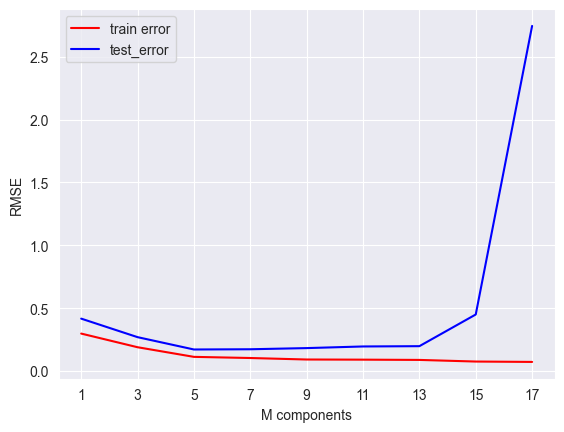

In [15]:
# you don't have to modify this cell
plt.plot(train_errors, "r")
plt.plot(test_errors, "b")
plt.legend(["train error", "test_error"])
plt.ylabel("RMSE")
plt.xlabel("M components")
plt.xticks(range(9), list(range(1, 18, 2)))
plt.show()

### What is the minimum RMSE on the test set (given M<=17)?


In [16]:
# you don't have to modify this cell
print(f"Minimum RMSE = {np.min(test_errors):.2f}")

Minimum RMSE = 0.17


### Question 3.c: Ridge regression

Extend your code to incorporate a prior on the weights of the regression function to perform _Ridge Regression_.
Repeat the above tasks with various regularization weights $\lambda$.
Which value gives good results?


In [17]:
def calculate_weights_ridge_regression(train_features, train_labels, alpha=0.01):
    """
    Simple weights calculation from features and labels, with ridge regression.

    Parameters
    ----------
    features : array_like
        input array of shape (N,K).
    labels : array_like
        labels of shape (N).

    Returns
    -------
    w : array_like
        resulting weights matrix (N,).

    """
    phi_inv = train_features.T @ train_features
    w = (
        np.linalg.inv(phi_inv + alpha * np.eye(phi_inv.shape[0], phi_inv.shape[1]))
        @ train_features.T
        @ train_labels
    )
    return w

In [18]:
assert 0 == calculate_weights_ridge_regression(np.array([[0]]), np.array([0]))
assert 1 == calculate_weights_ridge_regression(np.array([[1]]), np.array([1]), alpha=0)
assert 0.5 == calculate_weights_ridge_regression(
    np.array([[1]]), np.array([1]), alpha=1
)

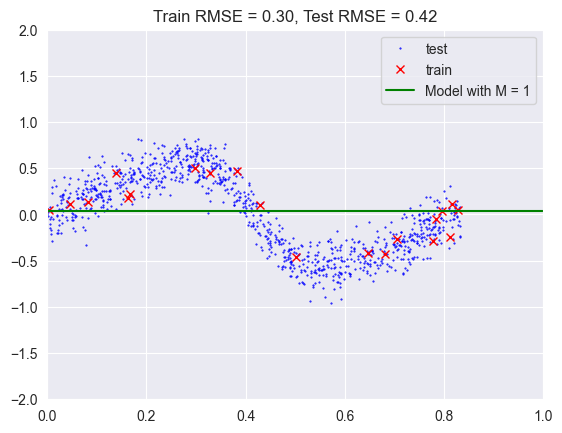

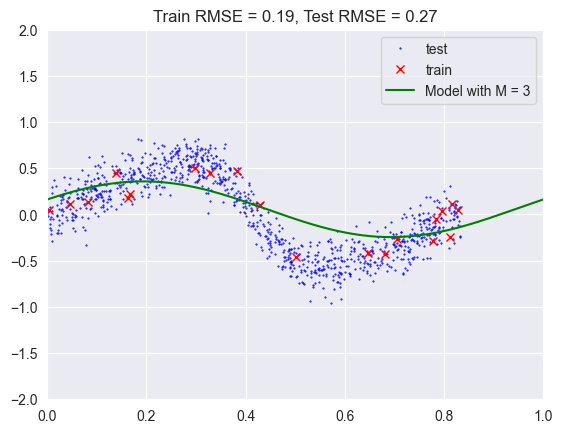

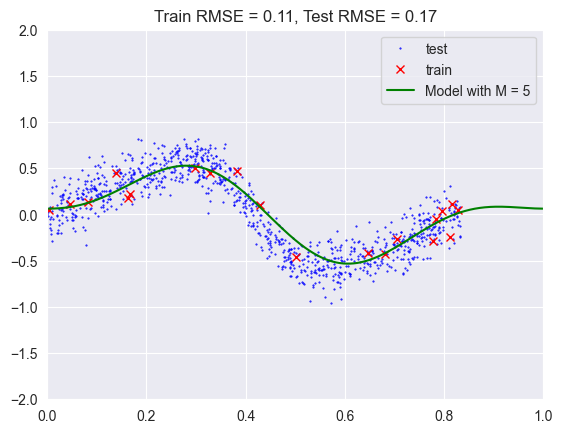

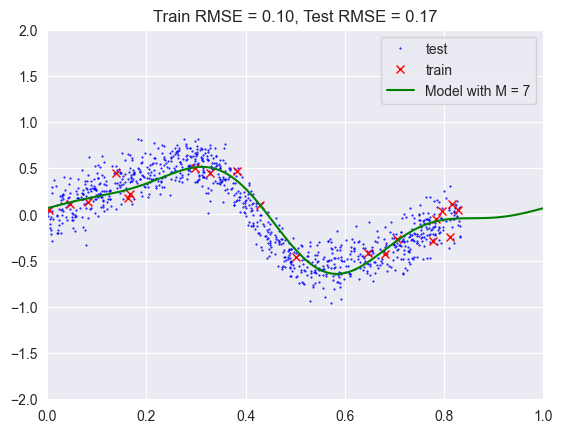

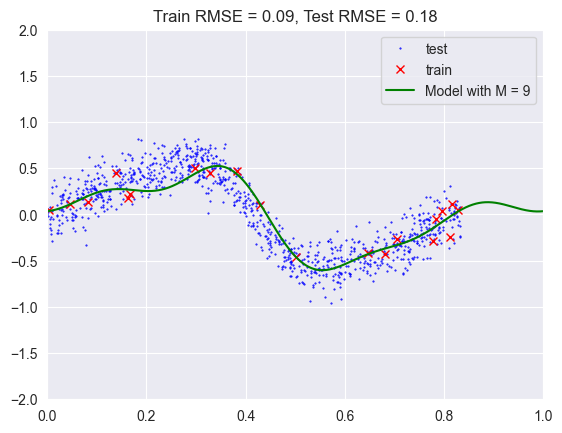

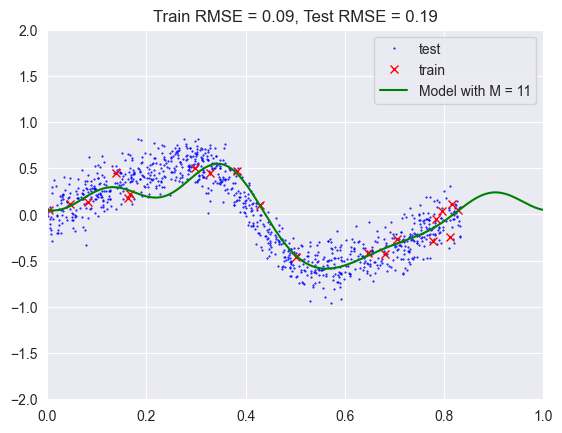

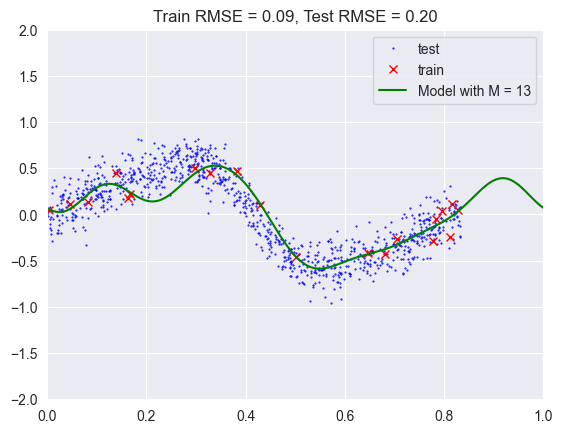

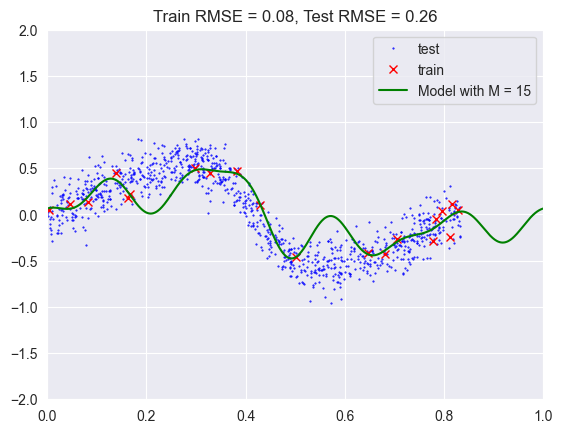

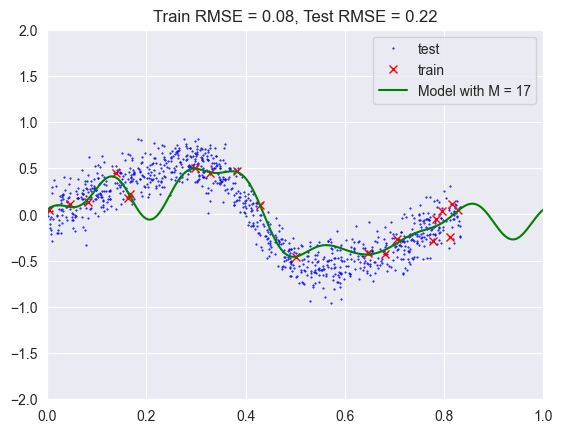

In [19]:
# you don't have to modify this cell
alpha = 0.01
x = np.linspace(0, 1, 1000)
train_errors_lambda = []
test_errors_lambda = []

for max_m in range(1, 18, 2):
    # calculate features and weights
    phi = get_feature_matrix(train_X, max_m)
    w = calculate_weights_ridge_regression(phi, train_y, alpha)

    # get predictions
    train_prediction = get_feature_matrix(train_X, max_m) @ w
    test_prediction = get_feature_matrix(test_X, max_m) @ w
    prediction_on_x = get_feature_matrix(x, max_m) @ w

    # calculate rmse metrics
    train_rmse = get_rmse(train_y, train_prediction)
    test_rmse = get_rmse(test_y, test_prediction)
    train_errors_lambda.append(train_rmse)
    test_errors_lambda.append(test_rmse)

    # plotting
    plt.title(f"Train RMSE = {train_rmse:.2f}, Test RMSE = {test_rmse:.2f}")

    legend = []
    legend.append("test")
    plt.plot(test_X, test_y, "bo", markersize=0.5)
    legend.append("train")
    plt.plot(train_X, train_y, "rx")
    legend.append(f"Model with M = {max_m}")
    plt.plot(x, prediction_on_x, "g-")

    plt.xlim([0, 1])
    plt.ylim([-2, 2])
    plt.legend(legend)
    plt.show()

In [20]:
# you don't have to modify this cell
print(f"Minimum RMSE for ridge regression = {np.min(test_errors_lambda):.2f}")

Minimum RMSE for ridge regression = 0.17


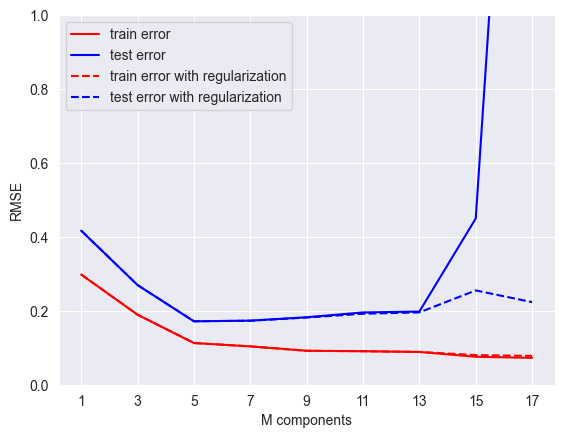

In [21]:
# you don't have to modify this cell
plt.plot(train_errors, "r")
plt.plot(test_errors, "b")
plt.plot(train_errors_lambda, "--r")
plt.plot(test_errors_lambda, "--b")
plt.legend(
    [
        "train error",
        "test error",
        "train error with regularization",
        "test error with regularization",
    ]
)
plt.ylabel("RMSE")
plt.xlabel("M components")
plt.xticks(range(9), list(range(1, 18, 2)))
plt.ylim([0, 1])
plt.show()

### What happens for the $M > 15$, and $\alpha = 0.01$:

1. train error > train error w regularization > test error > test error w regularization
2. test error > test error w regularization > train error > train error w regularization
3. test error w regularization > test error > train error > train error w regularization
4. test errr > test error w regularization > train error w regularization > train error


## Question 4 Kernel Ridge Regression


In the lecture it has been discussed that _Ridge Regression_ can be combined with _kernels_.
Extend the regression for the previous task such that it makes use of a kernel.


### Question 4.a: Ridge regression with exponential kernel

Squared exponential kernel:

$$
\begin{aligned}
                k(x,y) = \exp\left( - \frac{( x - y )^2}{2l^2} \right)
\end{aligned}
$$


In [22]:
def exponential_kernel(x, y, length_scale=0.4):
    """
    Calculation of exponential kernel based on inputs x and y.

    Parameters
    ----------
    x : array_like
        input array of shape (N).
    y : array_like
        labels of shape (N).
    length_scale : float
        parameter of exponential kernel.

    Returns
    -------
    kernel : array_like
        resulting kernel matrix (N,N).

    """
    x, y = x[:, None], y[:, None]
    D = (
        ((-2 * x @ y.T) / (length_scale**2))
        + np.sum(y**2 / (length_scale**2), axis=1)
        + np.sum(x**2 / (length_scale**2), axis=1)[:, None]
    )
    kernel = np.exp(-0.5 * D)
    return kernel

In [23]:
def get_matrix_a(kernel, train_labels, alpha=0.001):
    """
    Calculation of representation matrix.

    Parameters
    ----------
    kernel : array_like
        input array of shape (N,K).
    labels : array_like
        labels of shape (N).
    alpha : float
        constant to prevent matrix inverse from failing.

    Returns
    -------
    a : array_like
        resulting solution to dual representation matrix (N,).

    """
    a = np.linalg.inv(kernel + alpha * np.eye(kernel.shape[0])) @ train_labels
    return a

In [24]:
def estimate_at_location(test, train, a, kernel_function, kernel_parameters):
    """
    Simple weights calculation from features and labels, with ridge regression.

    Parameters
    ----------
    test : array_like
        input test data of shape (M,);
    train : array_like
        input train data of shape (N,);
    a : array_like
        dual representation matrix (N,);
    kernel_function : Callable
        desired kernel funciton. Default: polynomial_kernel;
    kernel_parameters : float
        kernel paramters for `kernel_function`.

    Returns
    -------
    prediction : array_like
        resulting estimation (M,).

    """
    kernel = kernel_function(test, train, kernel_parameters)
    prediction = kernel @ a
    return prediction

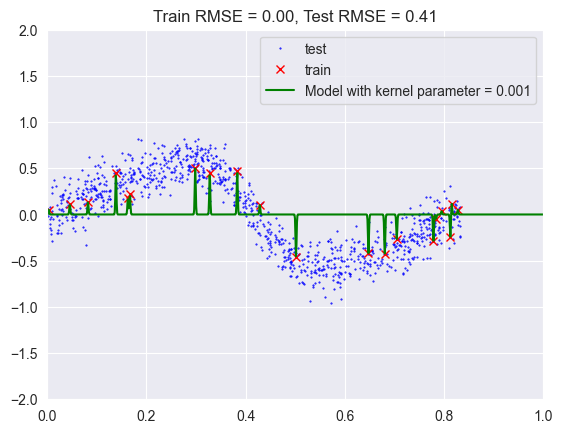

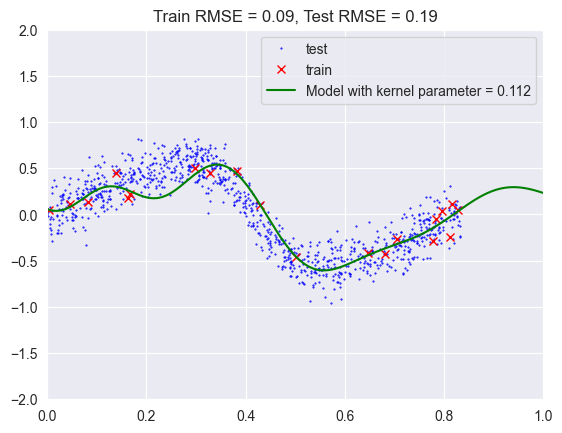

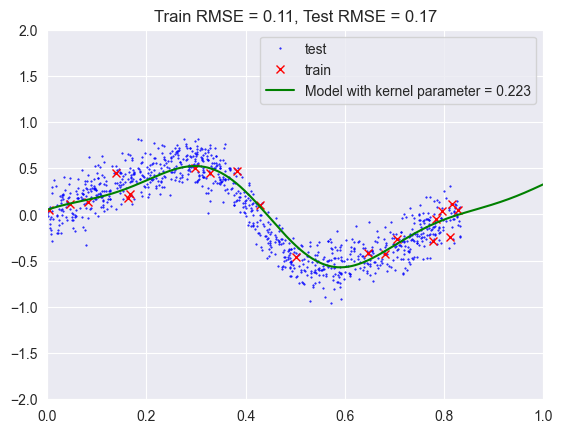

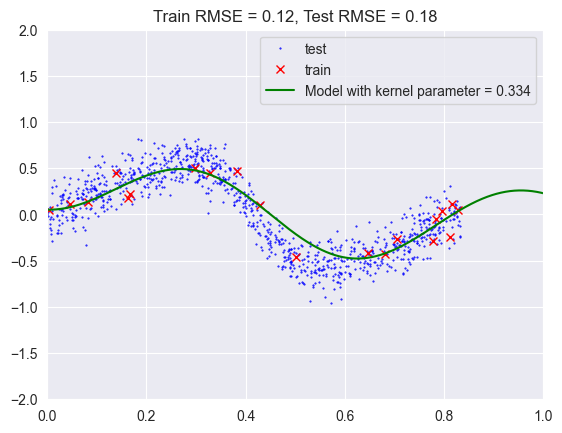

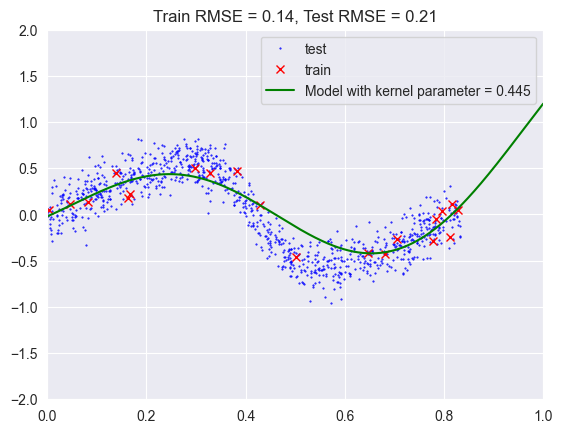

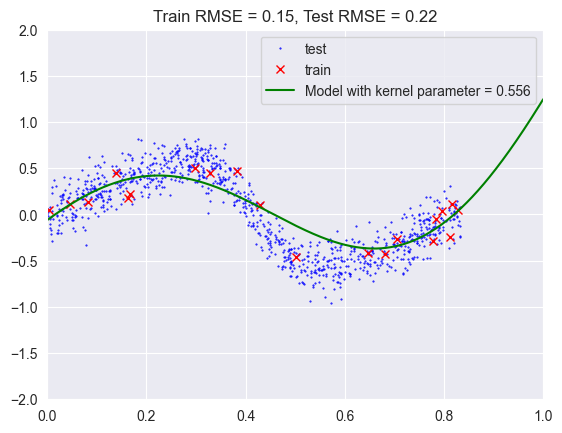

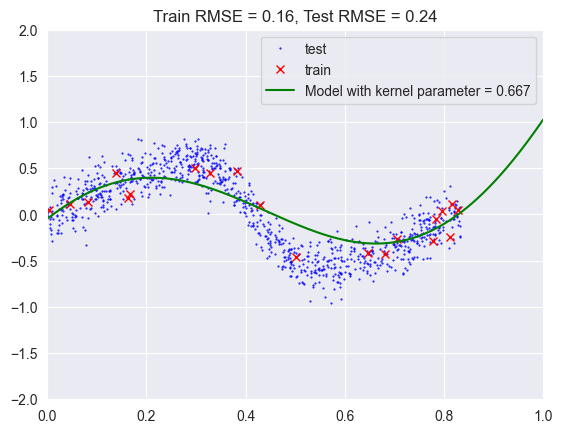

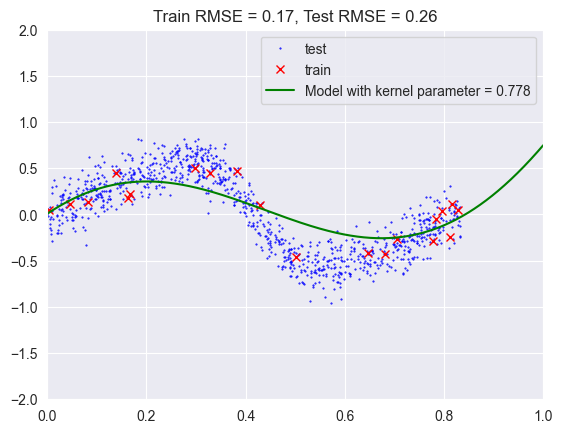

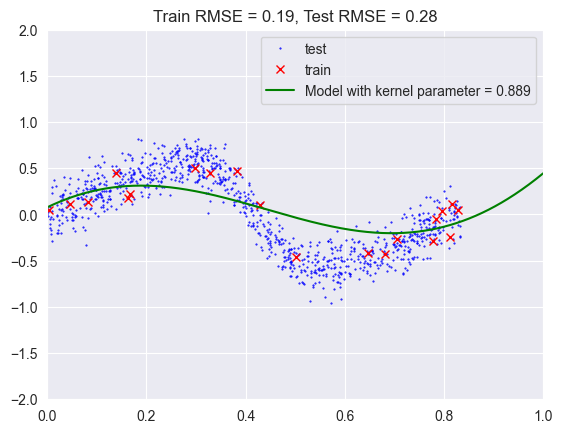

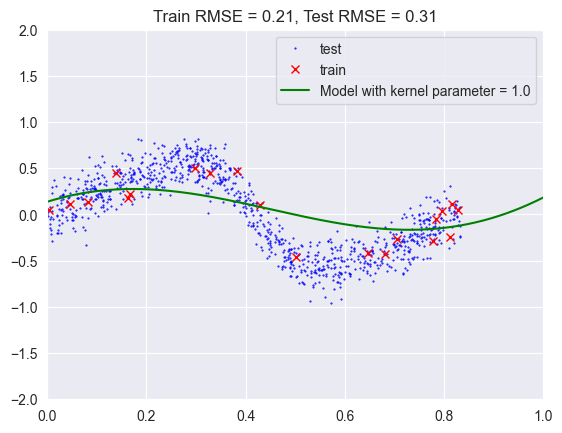

In [25]:
# you don't have to modify this cell
x = np.linspace(0, 1, 1000)
train_errors = []
test_errors = []

for kernel_parameters in np.linspace(0.001, 1, 10):
    # compute kernel
    kernel_matrix = exponential_kernel(train_X, train_X, length_scale=kernel_parameters)
    # compute solution for dual representation
    a = get_matrix_a(kernel_matrix, train_y, 0.001)

    # compute estimate at sampled locations
    train_prediction = estimate_at_location(
        train_X,
        train_X,
        a,
        kernel_function=exponential_kernel,
        kernel_parameters=kernel_parameters,
    )
    test_prediction = estimate_at_location(
        test_X,
        train_X,
        a,
        kernel_function=exponential_kernel,
        kernel_parameters=kernel_parameters,
    )
    prediction = estimate_at_location(
        x,
        train_X,
        a,
        kernel_function=exponential_kernel,
        kernel_parameters=kernel_parameters,
    )

    # calculate rmse metrics
    train_rmse = get_rmse(train_y, train_prediction.ravel())
    test_rmse = get_rmse(test_y, test_prediction.ravel())
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

    # plotting
    plt.title(f"Train RMSE = {train_rmse:.2f}, Test RMSE = {test_rmse:.2f}")

    legend = []
    legend.append("test")
    plt.plot(test_X, test_y, "bo", markersize=0.5)
    legend.append("train")
    plt.plot(train_X, train_y, "rx")
    legend.append(f"Model with kernel parameter = {kernel_parameters}")
    plt.plot(x, prediction, "g-")

    plt.xlim([0, 1])
    plt.ylim([-2, 2])
    plt.legend(legend)
    plt.show()

### What is the minimum RMSE on the test set for ridge regression with exponential kernel?


In [26]:
# you don't have to modify this cell
print(f"Minimum RMSE for ridge regression = {np.min(test_errors):.2f}")

Minimum RMSE for ridge regression = 0.17


### Question 4.b: Ridge regression with polynomial kernel

Exchange the kernel for the polynomial kernel:

$$
\begin{aligned}
    k(x,y) = \left(x * y +1 \right)^d
\end{aligned}
$$


In [27]:
def polynomial_kernel(x, y, d=5):
    """
    Calculation of polynomial kernel based on inputs x and y.

    Parameters
    ----------
    x : array_like
        input array of shape (N).
    y : array_like
        second input of shape (N).
    d : float
        parameter of polynomial kernel.

    Returns
    -------
    kernel : array_like
        resulting kernel matrix (N,N).

    """
    x, y = x[:, None], y[:, None]
    kernel = (x @ y.T + 1) ** d
    return kernel

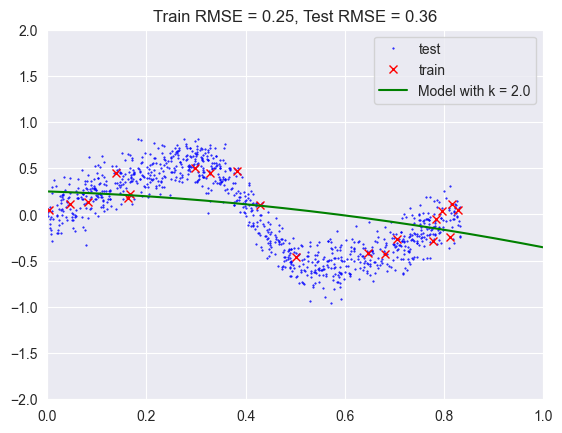

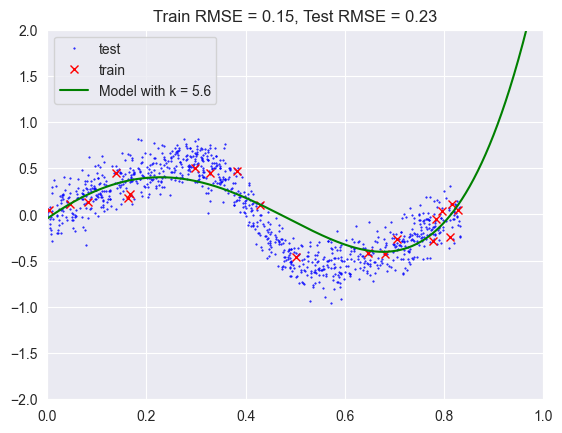

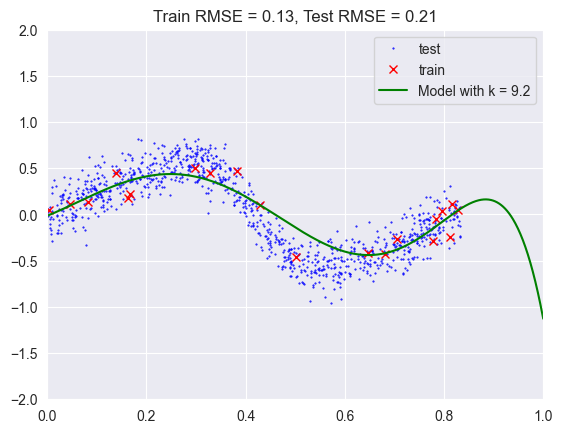

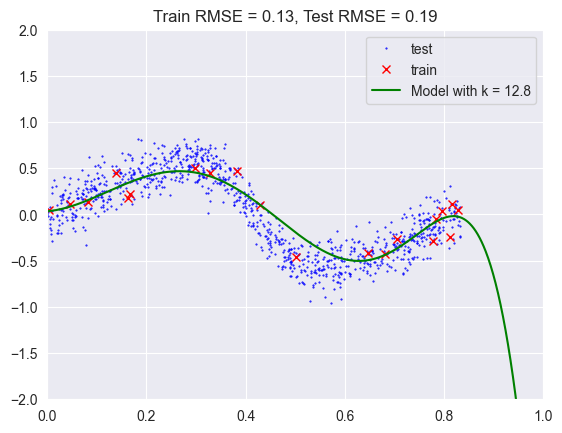

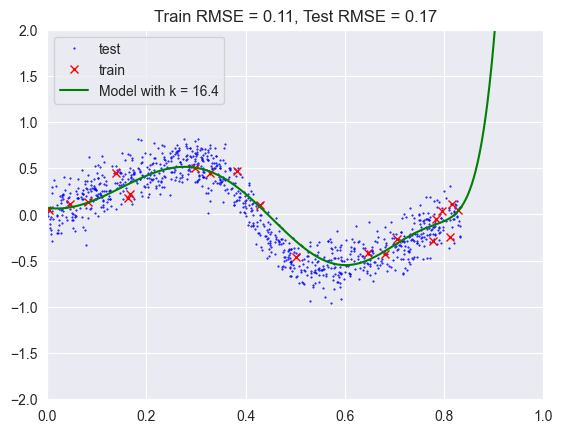

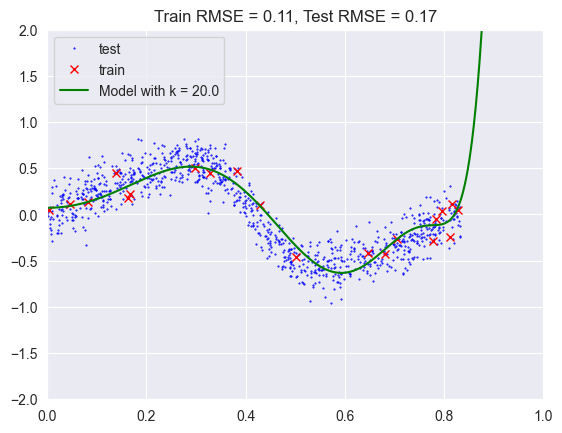

In [28]:
x = np.linspace(0, 1, 1000)
train_errors = []
test_errors = []

for kernel_parameters in np.linspace(2, 20, 6):
    # compute kernel
    kernel_matrix = polynomial_kernel(train_X, train_X, d=kernel_parameters)
    # compute solution for dual representation
    a = get_matrix_a(kernel_matrix, train_y, 0.001)

    # compute estimate at sampled locations
    train_prediction = estimate_at_location(
        train_X,
        train_X,
        a,
        kernel_function=polynomial_kernel,
        kernel_parameters=kernel_parameters,
    )
    test_prediction = estimate_at_location(
        test_X,
        train_X,
        a,
        kernel_function=polynomial_kernel,
        kernel_parameters=kernel_parameters,
    )
    prediction = estimate_at_location(
        x,
        train_X,
        a,
        kernel_function=polynomial_kernel,
        kernel_parameters=kernel_parameters,
    )

    # calculate rmse metrics
    train_rmse = get_rmse(train_y, train_prediction.ravel())
    test_rmse = get_rmse(test_y, test_prediction.ravel())
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

    # plotting
    plt.title(f"Train RMSE = {train_rmse:.2f}, Test RMSE = {test_rmse:.2f}")

    legend = []
    legend.append("test")
    plt.plot(test_X, test_y, "bo", markersize=0.5)
    legend.append("train")
    plt.plot(train_X, train_y, "rx")
    legend.append(f"Model with k = {kernel_parameters}")
    plt.plot(x, prediction, "g-")

    plt.xlim([0, 1])
    plt.ylim([-2, 2])
    plt.legend(legend)
    plt.show()

### What is the minimum RMSE on the test set for ridge regression with exponential kernel?


In [29]:
# you don't have to modify this cell
print(f"Minimum RMSE for ridge regression = {np.min(test_errors):.2f}")

Minimum RMSE for ridge regression = 0.17
